In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

Text(0.5, 1.0, 'Scattered data')

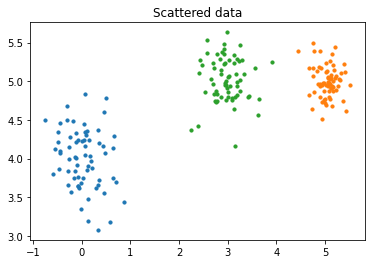

In [83]:
centers = [(0, 4), (5, 5), (3,5)]
cluster_std = [0.4, 0.2, 0.3]
n = 200

X, Y= make_blobs(n_samples=n, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s=10, label="Cluster1")
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s=10, label="Cluster2")
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s=10, label="Cluster3")
plt.title("Scattered data")

In [3]:
def validate(eps, minp, data, index):
  x, y = data.iloc[index]['X']  ,  data.iloc[index]['Y']
  temp =  data[((np.abs(x - data['X']) <= eps) & (np.abs(y - data['Y']) <= eps)) & (data.index != index)] #r
  #0 for core 1 for border 2 for noise
  if len(temp) >= minp:
      classP = 0
  elif (len(temp) < minp) and len(temp) > 0:
      classP = 1
  elif len(temp) == 0:
      classP = 2
  return (temp.index , classP)

In [111]:
def labelC(eps, minPts, data):
    nCluster = 1
    current = set()
    unvisited = list(data.index)
    arrIndex = [0] * n
    
    while unvisited:
        first_point = True
        current.add(random.choice(unvisited))
        while current:
            currI = current.pop()
            neighI, classP = validate(eps, minPts, data, currI)
            if (classP==1 and first_point):
                arrIndex[currI] = 0
                unvisited.remove(currI)
                unvisited = [e for e in unvisited if e not in neighI]
                continue
            unvisited.remove(currI)

            neighI = set(neighI) & set(unvisited)

            if classP==0:
                first_point = False
                arrIndex[currI] = nCluster
                current.update(neighI)
            elif classP==1:
                arrIndex[currI] = nCluster
                continue
            elif classP==2:
                arrIndex[currI] = 0
                continue  
            
        if not first_point:
            nCluster+=1
    return arrIndex, nCluster

200


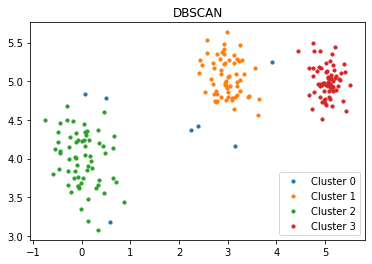

In [113]:
eps = 0.3
minp = 3

data = pd.DataFrame(X, columns = ["X", "Y"] )
arrIndex, nCluster = labelC(eps, minp, data)
print(len(arrIndex))
indx = list(range(0,n))

df = pd.DataFrame()
df['indx']  = indx
df['cluster']  = arrIndex

for clust in range(nCluster):
  plt.scatter(X[df["indx"][df["cluster"] == clust].values, 0], X[df["indx"][df["cluster"] == clust].values, 1], s=10, label=f"Cluster{clust}")

plt.legend([f"Cluster {clust}" for clust in range(nCluster)], loc ="lower right")
plt.title('DBSCAN')
plt.show()